In [51]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [52]:
# Load the data (replace 'your_data.csv' with the actual path to your dataset)
df = pd.read_csv('genres_v2.csv')

# drop invalid columns
df = df.drop(['Unnamed: 0'], axis=1)


/var/folders/cc/c2h4hf8x1rq2d8qclpl8dwdw0000gn/T/ipykernel_22368/211716109.py:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('genres_v2.csv')


In [53]:
features_to_use = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
                   'acousticness', 'instrumentalness', 'liveness', 'valence']
X = df[features_to_use]
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Normalizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)


In [54]:
# Applying K-Means
# The choice of 'k' (n_clusters) can be based on domain knowledge or using methods like the Elbow method
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Assigning the clusters
clusters = kmeans.labels_

# Adding the cluster information to the original dataframe
df['cluster'] = clusters

# display the songs in each cluster
for i in range(k):
    print('Songs in cluster', i)
    print(df[df['cluster'] == i]['song_name'].values)
    print('\n')

/Users/michaelosmolovskiy/anaconda3/envs/Spotify/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Songs in cluster 0
['Mercury: Retrograde' 'Pathology' 'Venom' ... nan nan nan]


Songs in cluster 1
['Symbiote' 'ProductOfDrugs (Prod. The Virus and Antidote)'
 'kamikaze (+ pulse)' ... nan nan nan]




In [55]:
from sklearn.metrics import silhouette_score

# Calculating Silhouette Score
silhouette_avg = silhouette_score(X_scaled, clusters)

silhouette_avg


0.16568302259063267

/var/folders/cc/c2h4hf8x1rq2d8qclpl8dwdw0000gn/T/ipykernel_22368/22973814.py:8: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('genres_v2.csv')
/Users/michaelosmolovskiy/anaconda3/envs/Spotify/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/michaelosmolovskiy/anaconda3/envs/Spotify/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/michaelosmolovskiy/anaconda3/envs/Spotify/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will 

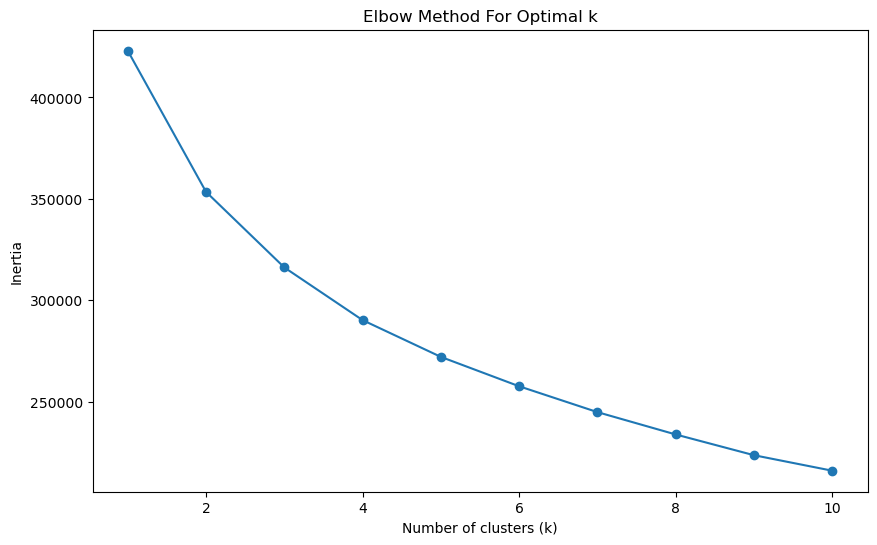

In [56]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd

# Reload the dataset
data = pd.read_csv('genres_v2.csv')

# Selecting relevant features and preprocessing
features_to_use = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
                   'acousticness', 'instrumentalness', 'liveness', 'valence']
X = data[features_to_use]
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Range of k to try
k_values = range(1, 11)

# List to store the inertias for each k
inertias = []

for k in k_values:
    # Create a KMeans instance with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Fit model to scaled data
    kmeans.fit(X_scaled)
    # Append the inertia to the list of inertias
    inertias.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertias, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


/Users/michaelosmolovskiy/anaconda3/envs/Spotify/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/michaelosmolovskiy/anaconda3/envs/Spotify/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/michaelosmolovskiy/anaconda3/envs/Spotify/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/michaelosmolovskiy/anaconda3/envs/Spotify/lib/python3.12/site-p

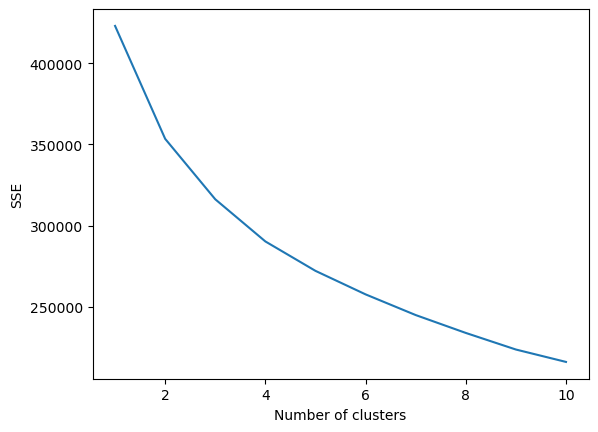

In [57]:
# Implement the elbow method to find the optimal number of clusters
import matplotlib.pyplot as plt
import numpy as np

# Calculate the sum of squared distances for different values of k
k_range = range(1, 11)
sse = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plot the SSE for each value of k
plt.plot(k_range, sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()
